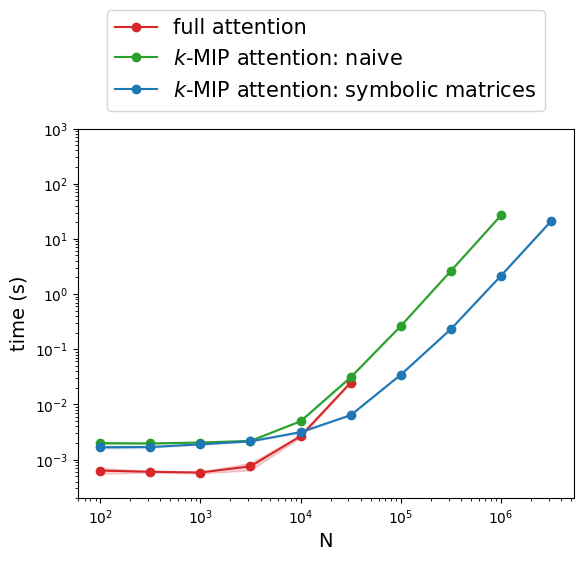

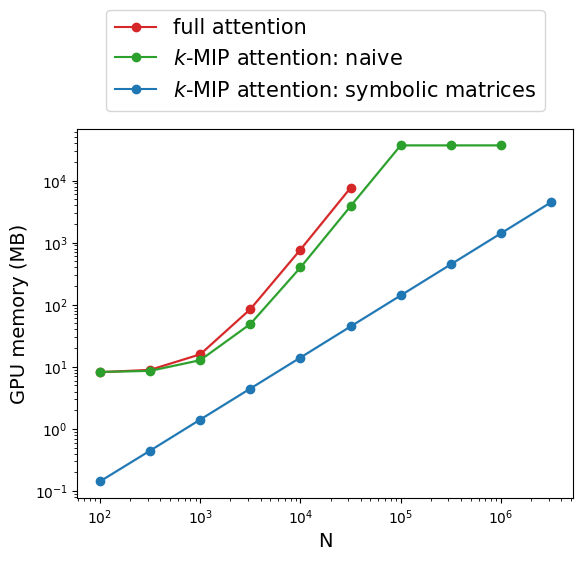

In [4]:
import math
from matplotlib import pyplot as plt
import numpy as np

# COMPARING THE EFFICIENCY IN INFERENCE OF full, naive AND sym
# All numbers were generated on a A100 GPU (with SXM4)
# time is in seconds, memory is in MB

# k=10
# kq_dim=10
# val_dim=10
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method full 
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method naive
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method sym
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --method flash_attn --dtype fp16 

colors = {
    'full': 'C3',
    'naive': 'C2',
    'sym': 'C0',
    'flash': 'C4',
}
legend_fontsize = 15
axis_fontsize = 14
ylim = [2e-4, 1e3]
display_flash = False

sqrt10 = math.sqrt(10)
Ns = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6, sqrt10*1e6, 1e7]
Ns = [int(N) for N in Ns]
bbox_y = 1.45 if display_flash else 1.35


# larger N gave OOM
full_forward_means = [np.float64(0.0006305217742919922), np.float64(0.0006011962890625), np.float64(0.0005825996398925781), np.float64(0.0007531642913818359), np.float64(0.0026564598083496094), np.float64(0.024792575836181642)]
full_forward_stds = [np.float64(7.350759920163753e-05), np.float64(2.1182306677334655e-05), np.float64(2.2009328035739487e-05), np.float64(0.00011592959682583733), np.float64(0.0001324587196183949), np.float64(0.0005419815674659028)]
full_peak_means = [np.float64(8.2177734375), np.float64(8.9365234375), np.float64(15.9091796875), np.float64(84.890625), np.float64(772.591796875), np.float64(7641.9716796875)]
full_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


# larger N possible
naive_forward_means = [np.float64(0.0019862174987792967), np.float64(0.0019591808319091796), np.float64(0.0020377635955810547), np.float64(0.00218048095703125), np.float64(0.004950857162475586), np.float64(0.03099989891052246), np.float64(0.2632915019989014), np.float64(2.626454210281372), np.float64(26.676008558273317)]
naive_forward_stds = [np.float64(9.776213054413163e-05), np.float64(5.0950134029150136e-05), np.float64(2.523680649931836e-05), np.float64(2.0959474787714766e-05), np.float64(2.9653981095793567e-05), np.float64(0.0009778980230386862), np.float64(7.993739420866716e-05), np.float64(0.001129561412676551), np.float64(0.0069403844870443475)]
naive_peak_means = [np.float64(8.26806640625), np.float64(8.6162109375), np.float64(12.80712890625), np.float64(48.99755859375), np.float64(398.22216796875), np.float64(3865.58447265625), np.float64(36917.857421875), np.float64(36917.857421875), np.float64(36917.857421875)]
naive_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]

# larger N possible
sym_forward_means = [np.float64(0.0016697883605957032), np.float64(0.0016876220703125), np.float64(0.0018877506256103516), np.float64(0.002139759063720703), np.float64(0.003139638900756836), np.float64(0.006375169754028321), np.float64(0.034453821182250974), np.float64(0.23143558502197265), np.float64(2.146422100067139), np.float64(20.96626091003418)]
sym_forward_stds = [np.float64(8.691377213615766e-05), np.float64(4.0342114460456197e-05), np.float64(3.2665050768359026e-05), np.float64(2.4639334576657045e-05), np.float64(9.013352499841369e-05), np.float64(3.125506621697168e-05), np.float64(1.0385202415443942e-05), np.float64(5.019317576716099e-05), np.float64(0.0002833185427679559), np.float64(0.0032899288796192)]
sym_peak_means = [np.float64(0.14306640625), np.float64(0.447265625), np.float64(1.4150390625), np.float64(4.466796875), np.float64(14.1171875), np.float64(44.63427734375), np.float64(141.14501953125), np.float64(446.337890625), np.float64(1411.43798828125), np.float64(4463.3583984375)]
sym_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


# larger N possible
flash_attn_forward_means = [np.float64(0.00019593238830566405), np.float64(0.00017218589782714845), np.float64(0.00017375946044921874), np.float64(0.000180816650390625), np.float64(0.0002946376800537109), np.float64(0.001804494857788086), np.float64(0.013100910186767577), np.float64(0.11548552513122559), np.float64(0.9154133796691895), np.float64(9.08273401260376)]
flash_attn_forward_stds = [np.float64(6.874536685697086e-05), np.float64(1.1291479742178965e-05), np.float64(1.1543399358800325e-05), np.float64(8.340698396334164e-06), np.float64(8.26649166319721e-06), np.float64(8.476442735019292e-07), np.float64(1.8462528857227736e-05), np.float64(0.00462678666225354), np.float64(0.00021989070370914972), np.float64(0.012303583657874626)]
flash_attn_peak_means = [np.float64(0.0205078125), np.float64(0.1396484375), np.float64(0.68994140625), np.float64(2.17333984375), np.float64(6.8681640625), np.float64(6.8681640625), np.float64(18.3125), np.float64(57.90576171875), np.float64(183.10693359375), np.float64(579.033203125)]
flash_attn_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]



# generate 3 plots with the same xlim and ylim
# plot 1: all forward means +- stds
# plot 2: all backward means +- stds
# plot 3: all total means +- stds

# # plot: all forward means +- stds

fig = plt.figure()

plt.plot(Ns[:len(full_forward_means)], full_forward_means, label="full attention", marker='o', color=colors['full'])
plt.fill_between(Ns[:len(full_forward_means)], np.array(full_forward_means) - np.array(full_forward_stds), np.array(full_forward_means) + np.array(full_forward_stds), alpha=0.2, color=colors['full'])
plt.plot(Ns[:len(naive_forward_means)], naive_forward_means, label="$k$-MIP attention: naive", marker='o', color=colors['naive'])
plt.fill_between(Ns[:len(naive_forward_means)], np.array(naive_forward_means) - np.array(naive_forward_stds), np.array(naive_forward_means) + np.array(naive_forward_stds), alpha=0.2, color=colors['naive'])
plt.plot(Ns[:len(sym_forward_means)], sym_forward_means, label="$k$-MIP attention: symbolic matrices", marker='o', color=colors['sym'])
plt.fill_between(Ns[:len(sym_forward_means)], np.array(sym_forward_means) - np.array(sym_forward_stds), np.array(sym_forward_means) + np.array(sym_forward_stds), alpha=0.2, color=colors['sym'])
if display_flash:
    plt.plot(Ns[:len(flash_attn_forward_means)], flash_attn_forward_means, label="flash attention (fp16)", marker='o', color=colors['flash'])
    plt.fill_between(Ns[:len(flash_attn_forward_means)], np.array(flash_attn_forward_means) - np.array(flash_attn_forward_stds), np.array(flash_attn_forward_means) + np.array(flash_attn_forward_stds), alpha=0.2, color=colors['flash'])

# plt.title('forward pass')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)
plt.xlabel('N', fontsize=axis_fontsize)
plt.ylabel('time (s)', fontsize=axis_fontsize)
plt.legend(loc='upper center', fontsize=legend_fontsize, bbox_to_anchor=(0.5, bbox_y), ncol=1)

plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-inference-forward.png', bbox_inches='tight')
plt.show()



# plot: all peak means +- stds

fig = plt.figure()

# plt.errorbar(Ns[:len(full_peak_means)], full_peak_means, yerr=full_peak_stds, label="full attention", fmt='o')
# plt.errorbar(Ns[:len(naive_peak_means)], naive_peak_means, yerr=naive_peak_stds, label="$k$-MIP attention: naive", fmt='o')
# plt.errorbar(Ns[:len(sym_peak_means)], sym_peak_means, yerr=sym_peak_stds, label="$k$-MIP attention: symbolic matrices", fmt='o')

plt.plot(Ns[:len(full_peak_means)], full_peak_means, label="full attention", marker='o', color=colors['full'])
plt.fill_between(Ns[:len(full_peak_means)], np.array(full_peak_means) - np.array(full_peak_stds), np.array(full_peak_means) + np.array(full_peak_stds), alpha=0.2, color=colors['full'])
plt.plot(Ns[:len(naive_peak_means)], naive_peak_means, label="$k$-MIP attention: naive", marker='o', color=colors['naive'])
plt.fill_between(Ns[:len(naive_peak_means)], np.array(naive_peak_means) - np.array(naive_peak_stds), np.array(naive_peak_means) + np.array(naive_peak_stds), alpha=0.2, color=colors['naive'])
plt.plot(Ns[:len(sym_peak_means)], sym_peak_means, label="$k$-MIP attention: symbolic matrices", marker='o', color=colors['sym'])
plt.fill_between(Ns[:len(sym_peak_means)], np.array(sym_peak_means) - np.array(sym_peak_stds), np.array(sym_peak_means) + np.array(sym_peak_stds), alpha=0.2, color=colors['sym'])
if display_flash:
    plt.plot(Ns[:len(flash_attn_peak_means)], flash_attn_peak_means, label="flash attention (fp16)", marker='o', color=colors['flash'])
    plt.fill_between(Ns[:len(flash_attn_peak_means)], np.array(flash_attn_peak_means) - np.array(flash_attn_peak_stds), np.array(flash_attn_peak_means) + np.array(flash_attn_peak_stds), alpha=0.2, color=colors['flash'])

# plt.title('peak')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N', fontsize=axis_fontsize)
plt.ylabel('GPU memory (MB)', fontsize=axis_fontsize)
plt.legend(loc='upper center', fontsize=legend_fontsize, bbox_to_anchor=(0.5, bbox_y), ncol=1)

plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-inference-peak.png', bbox_inches='tight')

plt.show()